# 0. Librerías

In [123]:
#pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [124]:
import pandas as pd
import numpy as np

from pandas_profiling import ProfileReport

from sklearn import datasets
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.tree import DecisionTreeRegressor


# 1. Carga de datos

In [125]:
df_lexp= pd.read_csv("content/data/lexp/Life Expectancy Data.csv")

# 2. Preprocesamiento

In [126]:
# Normalización y estandarización
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Encoding
from sklearn import preprocessing

# Nan Values
from sklearn.impute import SimpleImputer

# Para Train y Test
from sklearn.model_selection import train_test_split

In [127]:
df_lexp.head()

le = preprocessing.LabelEncoder() #Ocupamos label encoder, para transformar de variable cat4egorica a numerica
# Se extraen las columnas que se necesitan transformar
country = df_lexp['Country']
status = df_lexp['Status']

# Se hace la transformación
enc_status = le.fit_transform(status).reshape(-1,1)
enc_country = le.fit_transform(country).reshape(-1,1) 

# Se agregan las columnas transformadas al dataframe
df_lexp["Enc_status"] = enc_status
df_lexp["Enc_country"] = enc_country

# Se eliminan las columnas originales
df_lexp = df_lexp.drop(['Country','Status'], axis=1)

df_lexp

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Enc_status,Enc_country
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1,0
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1,0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1,0
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1,0
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,...,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,1,192
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,...,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,1,192
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,...,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,1,192
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,...,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,1,192


Se revisa cuantos valores *NaN*

In [128]:
print(df_lexp.isnull().sum())
# Tenemos muchas columnas con Nan, asi que se crearon dos copias para separar la eliminacion de datos segun el problema: Prediccion o Clasificacion

df_lexp.columns = df_lexp.columns.str.lower().str.replace(' ', '')# Limpieza de column names (Espacios y mayusculas)

df_regr = df_lexp.copy()
df_clas = df_lexp.copy()

Year                                 0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Enc_status                           0
Enc_country                          0
dtype: int64


# Parte 1: Regresión

Borramos la fila completa de aquellos registros que tengan un valor nan en las columnas de interes:

In [129]:
df_regr.columns

Index(['year', 'lifeexpectancy', 'adultmortality', 'infantdeaths', 'alcohol',
       'percentageexpenditure', 'hepatitisb', 'measles', 'bmi',
       'under-fivedeaths', 'polio', 'totalexpenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'population', 'thinness1-19years',
       'thinness5-9years', 'incomecompositionofresources', 'schooling',
       'enc_status', 'enc_country'],
      dtype='object')

In [130]:
# Se eliminan 2 columnas que se usaran en el modelo
df_regr.dropna(subset=['diphtheria'], inplace=True)
df_regr.dropna(subset=['adultmortality'], inplace=True)

print(df_regr.isnull().sum())
print(df_regr.shape)

year                              0
lifeexpectancy                    0
adultmortality                    0
infantdeaths                      0
alcohol                         181
percentageexpenditure             0
hepatitisb                      534
measles                           0
bmi                              21
under-fivedeaths                  0
polio                             0
totalexpenditure                215
diphtheria                        0
hiv/aids                          0
gdp                             435
population                      644
thinness1-19years                21
thinness5-9years                 21
incomecompositionofresources    160
schooling                       160
enc_status                        0
enc_country                       0
dtype: int64
(2909, 22)


### 0. X e Y sets

1. Elija como variable dependiente: “Life Expectancy”, y como variables independientes 5 variables a su elección. Considere estas variables para realizar los siguientes puntos 2, 3 y 4.

Las 5 variables independientes son:
1. percentage expenditure
2. HIV/AIDS
3. Enc_status
4. Adult Mortality
5. Diphtheria

In [131]:
prev_X = df_regr[['percentageexpenditure', 'hiv/aids','enc_status','adultmortality','diphtheria']]  # Input features, all columns except 'Status'

# Assuming numeric columns in X need to be standardized
scaler = MinMaxScaler()
X = scaler.fit_transform(prev_X)
# Convert X to dataframe
X = pd.DataFrame(X, columns = ['percentageexpenditure', 'hiv/aids','enc_status','adultmortality','diphtheria'])
Y = df_regr['lifeexpectancy']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=771)

## 1. Regresión lineal


2. Realice regresión lineal considerando las variables independientes para estimar la variable dependiente (Life expectancy). Divida en training set y testing set. Obtenga las métricas de rendimiento vistas en clases.

In [132]:
reg_lineal = linear_model.LinearRegression() #Se crea el objeto de regresion lineal
reg_lineal.fit(X_train, Y_train)#Se entrena el modelo con los datos de entrenamiento
y_predicted = reg_lineal.predict(X_test) # Se hacen predicciones con los datos de test


print("Métricas de rendimiento:\n")
# El mean squared error!!!!
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, y_predicted))
# El mean absolute error!!!!
print('Mean absolute error: %.2f'
      % mean_absolute_error(Y_test, y_predicted))
# El R2!!!!
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, y_predicted))

Métricas de rendimiento:

Mean squared error: 28.54
Mean absolute error: 3.98
Coefficient of determination: 0.68


## 2. Regresión Lasso

3. Realice regresión Lasso considerando las variables independientes para estimar la variable dependiente (Life expectancy). Divida en training set y testing set. Obtenga las métricas de rendimiento vista en clases. Además, obtenga los coeficientes de regresión y explique cuáles variables fueron consideradas en la regresión y cuáles no.


In [133]:
reg_lasso = linear_model.Lasso(alpha=0.001) #Se crea el objeto de regresion Lasso
reg_lasso.fit(X_train, Y_train)#Se entrena el modelo con los datos de entrenamiento
y_predicted = reg_lasso.predict(X_test) # Se hacen predicciones con los datos de test


print("Métricas de rendimiento:\n")
# El mean squared error!!!!
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, y_predicted))
# El mean absolute error!!!!
print('Mean absolute error: %.2f'
      % mean_absolute_error(Y_test, y_predicted))
# El R2!!!!
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, y_predicted))
# Los coeficientes
print('\nCoeficientes de regresión: \n', 'Intercepto: ',reg_lasso.intercept_, '\nCoeficientes:',reg_lasso.coef_)

Métricas de rendimiento:

Mean squared error: 28.51
Mean absolute error: 3.98
Coefficient of determination: 0.68

Coeficientes de regresión: 
 Intercepto:  69.59821072759448 
Coeficientes: [ 12.20063984 -28.52310502  -5.32006993 -20.41713674  10.8634599 ]


Luego, las variables y sus coeficientes son:

1. Percentage expenditure: $12.20$
2. HIV/AIDS: $-28.52$
3. Enc_status: $-5.32$
4. Adult Mortality: $-20.42$
5. Diphtheria: $10.86$

Con base en lo anterior, se puede concluir que todas las variables fueron consideradas para la regresion, pero las dos variables que influyeron más fueron **HIV/AIDS** y **Adult Mortality** y la que menos influyo fue **Enc_status**.

## 3. Árbol de Regresión


4. Realice regresión mediante árbol de regresión considerando las variables independientes para estimar la variable dependiente (Life expectancy). Divida en training set y testing set. Obtenga las métricas de rendimiento vistas en clases.

In [134]:
reg_tree = DecisionTreeRegressor(max_depth =7)#Se crea el objeto del regresor con arbol de decision
reg_tree.fit(X_train, Y_train)#Se entrena el modelo con los datos de entrenamiento
y_predicted = reg_tree.predict(X_test) # Se hacen predicciones con los datos de test

print("Métricas de rendimiento:\n")
# El mean squared error!!!!
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, y_predicted))
# El mean absolute error!!!!
print('Mean absolute error: %.2f'
      % mean_absolute_error(Y_test, y_predicted))
# El R2!!!!
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, y_predicted))

Métricas de rendimiento:

Mean squared error: 8.00
Mean absolute error: 2.04
Coefficient of determination: 0.91


Profundidad del árbol: 7


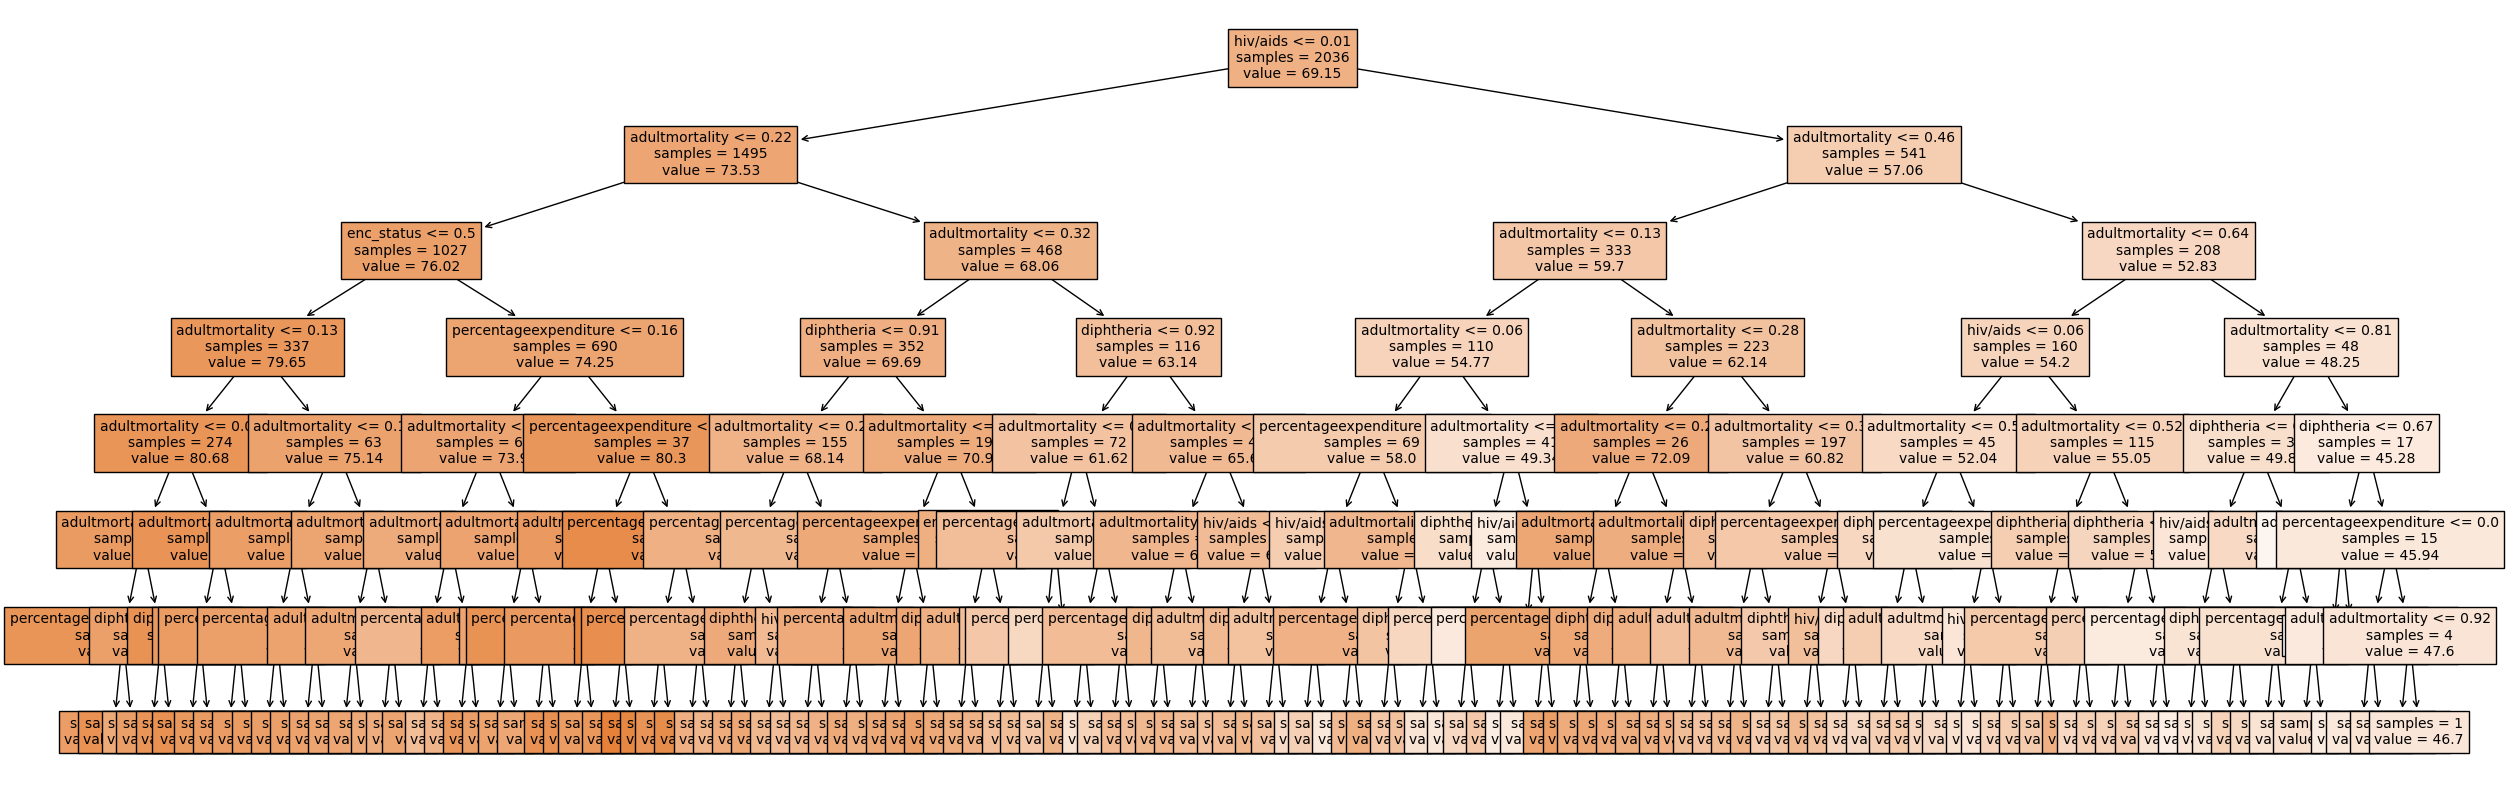

In [135]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(30, 10))
print('Profundidad del árbol:', reg_tree.get_depth())

plot = plot_tree(decision_tree = reg_tree, 
      feature_names = X.columns.tolist(),
      filled = True,
      impurity = False,
      fontsize = 10,
      precision = 2,
      ax = ax)

# Parte 2: Clasificación

### 0. X e Y sets

1. Elija como variable dependiente: “Status”, y como variables independientes al menos 10 variables a su elección. Considere estas variables para realizar los siguientes puntos 2, 3 y 4. Si fuese necesario, realice: encodeo, normalización, estandarización, imputación, etc.

In [136]:
print(df_clas.isnull().sum())

# Se eliminan los NaN de las columnas que se van a utilizar para los modelos de clasificación
df_clas.dropna(subset=["adultmortality", "diphtheria", "hepatitisb", "polio", "hiv/aids", "thinness1-19years", "thinness5-9years", "incomecompositionofresources", "gdp", "alcohol", "population"], inplace=True)

print(df_clas.isnull().sum())
print(df_clas.shape)


year                              0
lifeexpectancy                   10
adultmortality                   10
infantdeaths                      0
alcohol                         194
percentageexpenditure             0
hepatitisb                      553
measles                           0
bmi                              34
under-fivedeaths                  0
polio                            19
totalexpenditure                226
diphtheria                       19
hiv/aids                          0
gdp                             448
population                      652
thinness1-19years                34
thinness5-9years                 34
incomecompositionofresources    167
schooling                       163
enc_status                        0
enc_country                       0
dtype: int64
year                            0
lifeexpectancy                  0
adultmortality                  0
infantdeaths                    0
alcohol                         0
percentageexpenditure    

In [137]:
prev_X = df_clas[["adultmortality", "diphtheria", "hepatitisb", "polio", "hiv/aids", "thinness1-19years", "thinness5-9years", "incomecompositionofresources", "gdp", "alcohol", "population", "enc_country"]]  # Input features, all columns except 'Status' column
Y = df_clas['enc_status']  # Output variable, 'Status' column

# Assuming numeric columns in X need to be standardized
scaler = MinMaxScaler()
X= scaler.fit_transform(prev_X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)



### 1. KNN

2. Realice clasificación usando el algoritmo K-NN considerando las variables independientes para estimar la variable dependiente (Status). Divida en training set y testing set. Obtenga las métricas de rendimiento vistas en clases.


In [138]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
k = 5  # Number of neighbors to consider (can be adjusted)
model_KNN = KNeighborsClassifier(n_neighbors=k)

# Train the model_SVM on the training data
model_KNN.fit(X_train, Y_train)

# Predict 'Status' on the test set
Y_pred_KNN = model_KNN.predict(X_test)


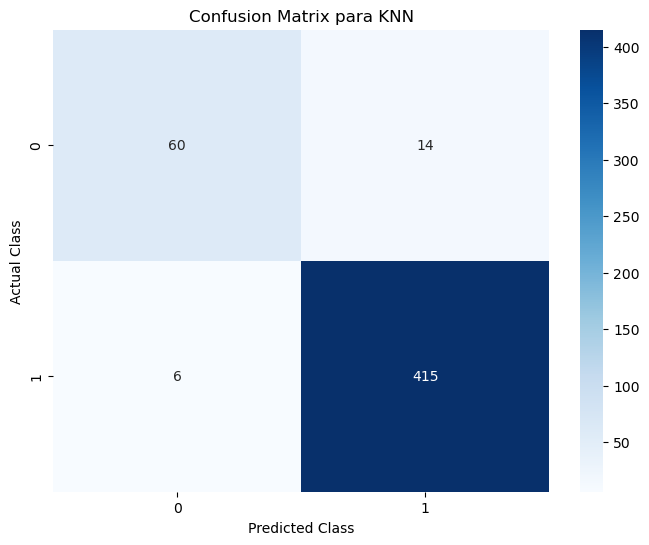


Reporte de clasificación: 
               precision    recall  f1-score   support

           0       0.91      0.81      0.86        74
           1       0.97      0.99      0.98       421

    accuracy                           0.96       495
   macro avg       0.94      0.90      0.92       495
weighted avg       0.96      0.96      0.96       495



In [139]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Calculate the confusion matrix
confusion_mat = confusion_matrix(Y_test, Y_pred_KNN)

# Get the class labels from the 'Status' column
class_labels = np.unique(Y_train)
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix para KNN')
plt.show()

# Get the classification report
report_KNN = classification_report(Y_test, Y_pred_KNN)

print("\nReporte de clasificación: \n", report_KNN)






## SVM

Realice clasificación usando el algoritmo SVM considerando las variables independientes para estimar la variable dependiente (Status). Divida en training set y testing set. Obtenga las métricas de rendimiento vistas en clases.

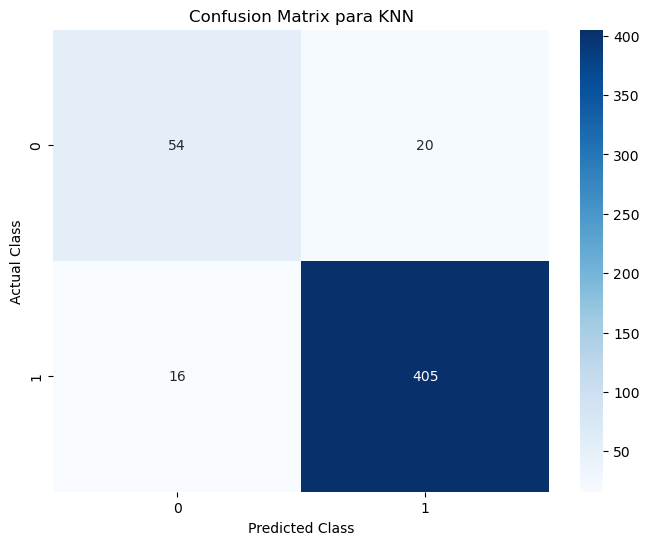


Reporte de clasificación: 
               precision    recall  f1-score   support

           0       0.77      0.73      0.75        74
           1       0.95      0.96      0.96       421

    accuracy                           0.93       495
   macro avg       0.86      0.85      0.85       495
weighted avg       0.93      0.93      0.93       495



In [140]:
from sklearn import svm

# Creamos un objeto de SVM con kernel lineal
model_SVM = svm.SVC(kernel='linear', gamma='auto', C=2)
model_SVM = model_SVM.fit(X_train, Y_train)
Y_pred_SVM = model_SVM.predict(X_test)

confusion_mat_SVM = confusion_matrix(Y_test, Y_pred_SVM)

# Get the class labels from the 'Status' column
class_labels = np.unique(Y_train)
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_SVM, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix para KNN')
plt.show()

report = classification_report(Y_test, Y_pred_SVM)

print("\nReporte de clasificación: \n", report)


## Cross-Validation

Realice Cross-Validation a los algoritmos implementados en los pasos 2 y 3. Obtenga una métrica global del proceso. Por último, revise si existe Overfitting dados los resultados del training y testing set.

In [141]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define custom scorers
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_weighted',
    'recall': 'recall_weighted',
    'f1': 'f1_weighted'
}

# Perform cross-validation for KNN
knn_cv_results = cross_validate(model_KNN, X_train, Y_train, cv=5, scoring=scoring, return_train_score=True)

# Perform cross-validation for SVM
svm_cv_results = cross_validate(model_SVM, X_train, Y_train, cv=5, scoring=scoring, return_train_score=True)

# Get the mean scores for each metric across all folds for KNN and SVM
mean_accuracy_knn_train = knn_cv_results['train_accuracy'].mean()
mean_accuracy_knn_test = accuracy_score(Y_test, Y_pred_KNN)

mean_precision_knn_train = knn_cv_results['train_precision'].mean()
mean_precision_knn_test = precision_score(Y_test, Y_pred_KNN, average='weighted')

mean_recall_knn_train = knn_cv_results['train_recall'].mean()
mean_recall_knn_test = recall_score(Y_test, Y_pred_KNN, average='weighted')

mean_f1_knn_train = knn_cv_results['train_f1'].mean()
mean_f1_knn_test = f1_score(Y_test, Y_pred_KNN, average='weighted')

mean_accuracy_svm_train = svm_cv_results['train_accuracy'].mean()
mean_accuracy_svm_test = accuracy_score(Y_test, Y_pred_SVM)

mean_precision_svm_train = svm_cv_results['train_precision'].mean()
mean_precision_svm_test = precision_score(Y_test, Y_pred_SVM, average='weighted')

mean_recall_svm_train = svm_cv_results['train_recall'].mean()
mean_recall_svm_test = recall_score(Y_test, Y_pred_SVM, average='weighted')

mean_f1_svm_train = svm_cv_results['train_f1'].mean()
mean_f1_svm_test = f1_score(Y_test, Y_pred_SVM, average='weighted')

# Print the results
print("KNN Cross-Validation Metrics:")
print("Mean Training Accuracy:", mean_accuracy_knn_train)
print("Mean Testing Accuracy:", mean_accuracy_knn_test)
print("Mean Training Precision:", mean_precision_knn_train)
print("Mean Testing Precision:", mean_precision_knn_test)
print("Mean Training Recall:", mean_recall_knn_train)
print("Mean Testing Recall:", mean_recall_knn_test)
print("Mean Training F1-score:", mean_f1_knn_train)
print("Mean Testing F1-score:", mean_f1_knn_test)

print("\nSVM Cross-Validation Metrics:")
print("Mean Training Accuracy:", mean_accuracy_svm_train)
print("Mean Testing Accuracy:", mean_accuracy_svm_test)
print("Mean Training Precision:", mean_precision_svm_train)
print("Mean Testing Precision:", mean_precision_svm_test)
print("Mean Training Recall:", mean_recall_svm_train)
print("Mean Testing Recall:", mean_recall_svm_test)
print("Mean Training F1-score:", mean_f1_svm_train)
print("Mean Testing F1-score:", mean_f1_svm_test)



KNN Cross-Validation Metrics:
Mean Training Accuracy: 0.9859183070450677
Mean Testing Accuracy: 0.9595959595959596
Mean Training Precision: 0.985917573793151
Mean Testing Precision: 0.9586541404723223
Mean Training Recall: 0.9859183070450677
Mean Testing Recall: 0.9595959595959596
Mean Training F1-score: 0.9859083190211294
Mean Testing F1-score: 0.9586316951022833

SVM Cross-Validation Metrics:
Mean Training Accuracy: 0.9464910676178281
Mean Testing Accuracy: 0.9272727272727272
Mean Training Precision: 0.9463280185464484
Mean Testing Precision: 0.9258059587471352
Mean Training Recall: 0.9464910676178281
Mean Testing Recall: 0.9272727272727272
Mean Training F1-score: 0.9463858868038221
Mean Testing F1-score: 0.9264345583494519


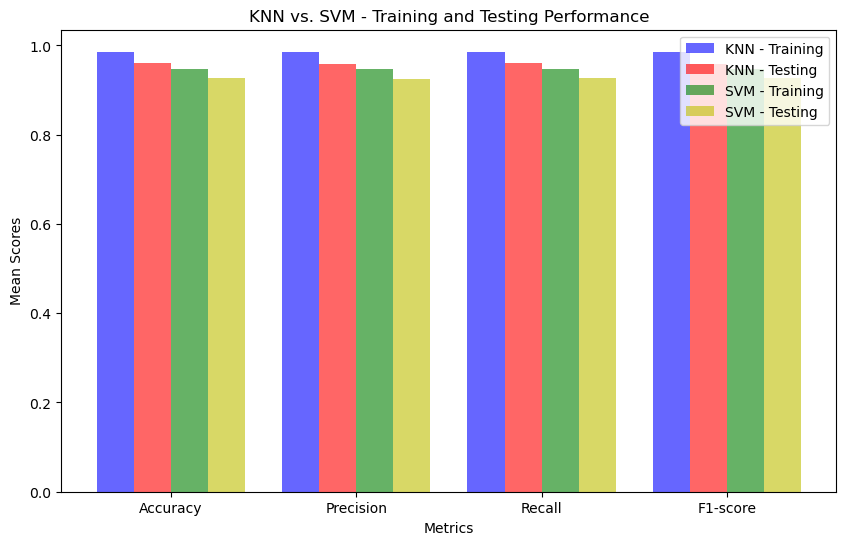

In [142]:
# Define the metrics and their corresponding mean scores for KNN and SVM
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
knn_train_scores = [mean_accuracy_knn_train, mean_precision_knn_train, mean_recall_knn_train, mean_f1_knn_train]
knn_test_scores = [mean_accuracy_knn_test, mean_precision_knn_test, mean_recall_knn_test, mean_f1_knn_test]
svm_train_scores = [mean_accuracy_svm_train, mean_precision_svm_train, mean_recall_svm_train, mean_f1_svm_train]
svm_test_scores = [mean_accuracy_svm_test, mean_precision_svm_test, mean_recall_svm_test, mean_f1_svm_test]

# Set the positions and width for the bars
num_metrics = len(metrics)
bar_width = 0.2
index = np.arange(num_metrics)

# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.bar(index - bar_width, knn_train_scores, bar_width, label='KNN - Training', color='b', alpha=0.6)
plt.bar(index, knn_test_scores, bar_width, label='KNN - Testing', color='r', alpha=0.6)
plt.bar(index + bar_width, svm_train_scores, bar_width, label='SVM - Training', color='g', alpha=0.6)
plt.bar(index + bar_width * 2, svm_test_scores, bar_width, label='SVM - Testing', color='y', alpha=0.6)

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Mean Scores')
plt.title('KNN vs. SVM - Training and Testing Performance')
plt.xticks(index + bar_width / 2, metrics)
plt.legend()

plt.show()

